In [1]:
import numpy as np
import scipy
from scipy import signal
import soundfile as sf
import struct
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib tk

Theoretical calculation of PDM built-in high pass filter

numerator: [ 1. -1.]; Denominator: [ 1.     -0.9375]. 
the cut off frequency is 140.625
The frequency response on 1kHZ is 0.16302309477496063dB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


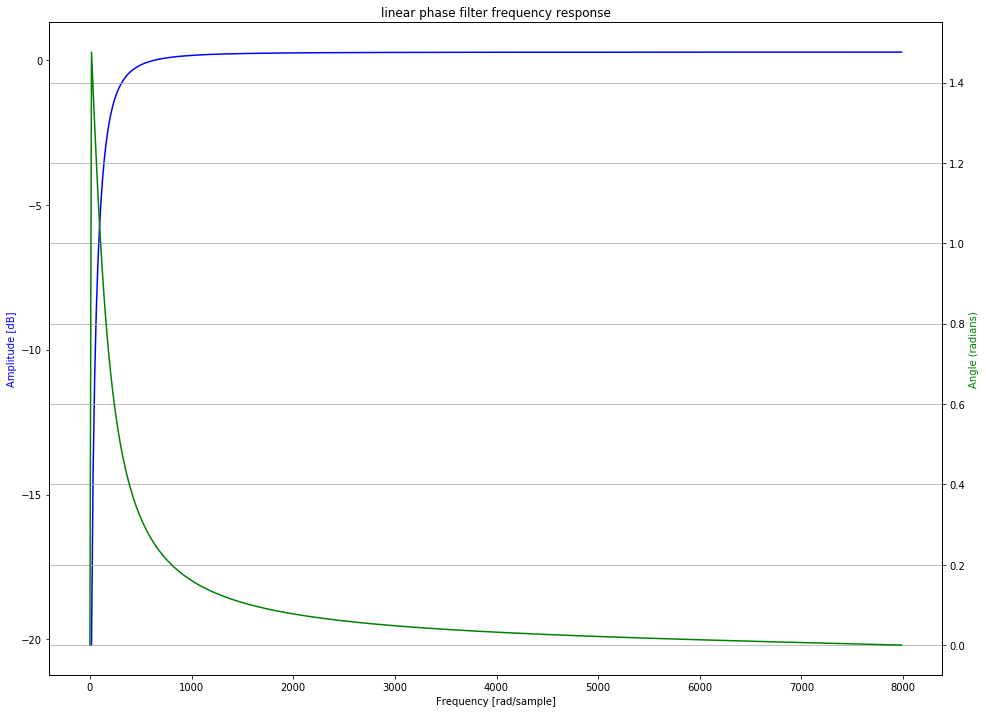

In [8]:
HP_Gain = -(12)+8

filtNumer = np.array([1., -1.], dtype=float)

filtDenom = np.array([1, -(1-2**HP_Gain)], dtype=float)

print('numerator: {}; Denominator: {}. '.format(filtNumer, filtDenom))

w, h = signal.freqz(filtNumer, filtDenom, fs=16000)

cutoff_freq = w[np.where(20*np.log10(abs(h)) <= -3)[0][-1]]

print("the cut off frequency is {}".format(cutoff_freq))

freq_idx = (np.abs(w-1000)).argmin()

print("The frequency response on 1kHZ is {}dB".format(20*np.log10(abs(h))[freq_idx]))

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.set_title('linear phase filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


Apollo application digital filter theoretical calculation

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


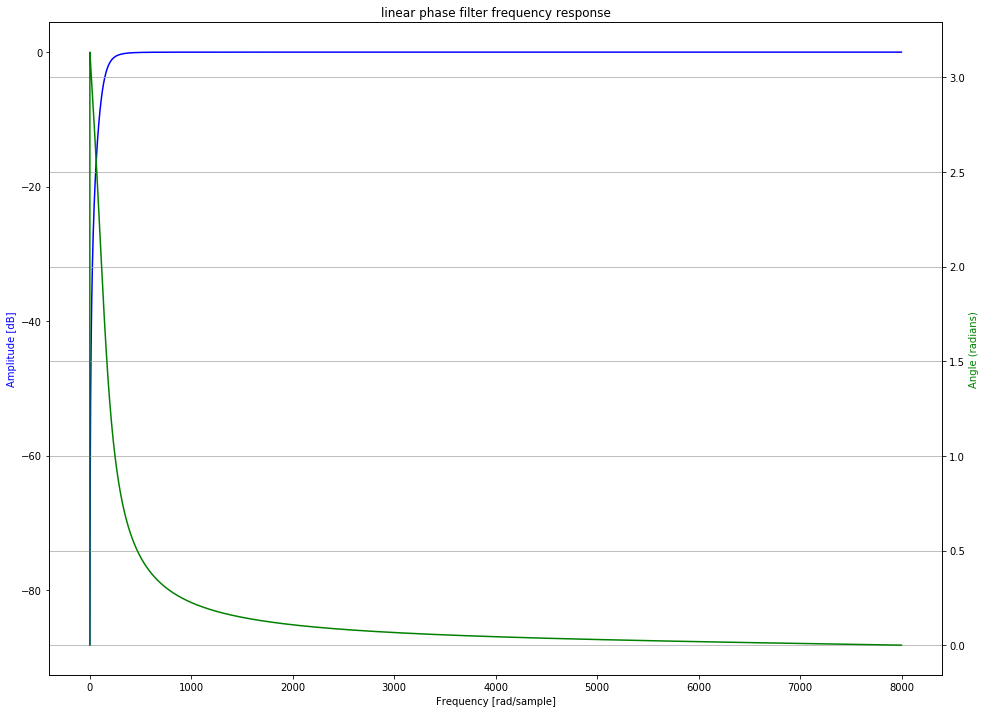

In [3]:
DF_numer = np.array([0.9565432255568771, -1.9130864511137542, 0.9565432255568771], dtype=float)
DF_denom = np.array([1, -1.9111970674260734, 0.9149758348014341], dtype=float)

w, h = signal.freqz(DF_numer, DF_denom, worN=8000, fs=16000)

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.set_title('linear phase filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

Generate a sinusoidal signal for test

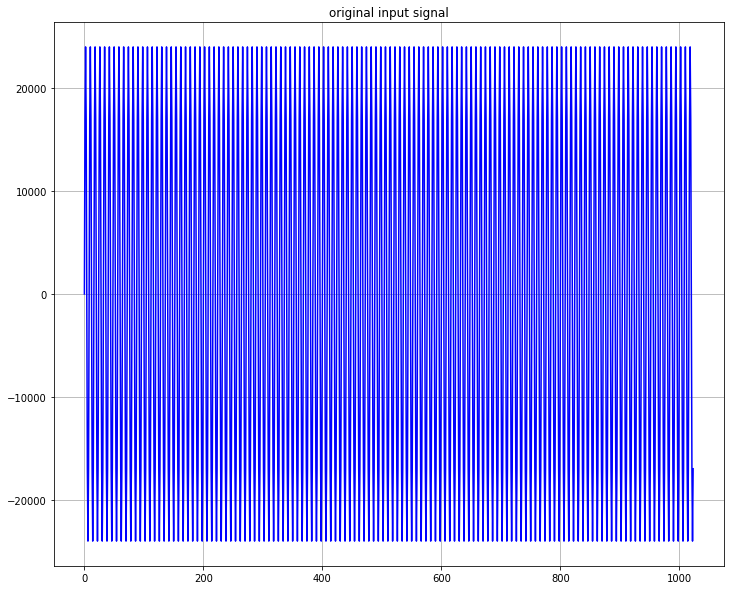

In [4]:
f = 2000
amp = 24000
Fs = 16000
sig_length = 1024

local_test_sig = []
for i in range(sig_length):
    local_test_sig.append(amp * np.sin(2*np.pi*f*i/Fs))
local_test_sig = np.array(local_test_sig)

fig = plt.figure(figsize=(12,10))
plt.title("original input signal")
plt.plot(local_test_sig, 'b')
plt.grid(True)
plt.show()

In [5]:
apollo_digital_filter_output = signal.lfilter(DF_numer, DF_denom, local_test_sig)

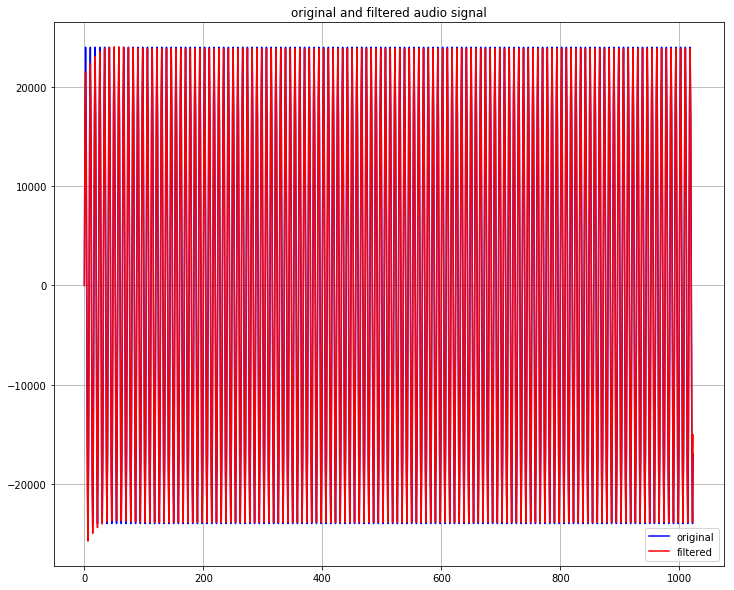

In [6]:
fig = plt.figure(figsize=(12,10))
plt.title("original and filtered audio signal")
plt.plot(local_test_sig, 'b')
plt.plot(apollo_digital_filter_output, 'r')
plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [9]:
apollo_DF_output = [0, 4269, -475, -59, -114, 155, -39, -5,
-37, 45, -8, 0, -20, 20, -1, 1,
-14, 10, 1, 2, -12, 6, 3, 2,
-10, 3, 4, 2, -10, 1, 5, 3,
-11, 0, 8, 3, -13, 0, 11, 4,
-17, -1, 20, 4, -34, 4, 63, -78,
-572, -1201, -1587, -1556, -1284, -960, -563, 24,
715, 1264, 1491, 1451, 1262, 964, 482, -188,
-911, -1433, -1602, -1452, -1154, -790, -313, 320,
964, 1396, 1509, 1401, 1175, 819, 247, -484,
-1164, -1546, -1570, -1342, -1017, -608, -62, 604,
1187, 1491, 1482, 1308, 1037, 622, -18, -746,
-1323, -1554, -1490, -1246, -931, -508, 14, 616,
1137, 1453, 1480, 1335, 1090, 741, 166, -554,
-1202, -1536, -1554, -1343, -1019, -589, -49, 595,
1181, 1509, 1489, 1284, 1027, 646, -34, -875,
-1475, -1557, -1276, -900, -486, 90, 771, 1311,
1518, 1457, 1258, 950, 446, -242, -962, -1464,
-1619, -1462, -1153, -765, -267, 374, 1009, 1427,
1526, 1410, 1175, 804, 208, -541, -1220, -1581,
-1582, -1341, -1012, -592, -28, 651, 1232, 1529,
1515, 1331, 1034, 580, -81, -806, -1362, -1571,
-1476, -1211, -883, -453, 112, 743, 1242, 1479,
1468, 1311, 1061, 663, 70, -649, -1267, -1584,
-1559, -1331, -1001, -580, -8, 651, 1231, 1530,
1526, 1321, 1027, 580, -78, -842, -1390, -1520,
-1289, -913, -460, 111, 775, 1310, 1536, 1467,
1265, 968, 490, -216, -961, -1466, -1579, -1405,
-1105, -740, -233, 408, 1033, 1416, 1493, 1353,
1118, 755, 190, -545, -1214, -1578, -1568, -1333,
-1000, -578, 6, 678, 1238, 1490, 1454, 1252,
961, 504, -149, -884, -1422, -1611, -1481, -1208,
-846, -359, 299, 963, 1423, 1542, 1429, 1187,
844, 280, -445, -1153, -1545, -1586, -1350, -1049,
-640, -115, 586, 1178, 1531, 1500, 1372, 1072,
691, -82, -725, -1366, -1377, -1915, -1006, -1185]

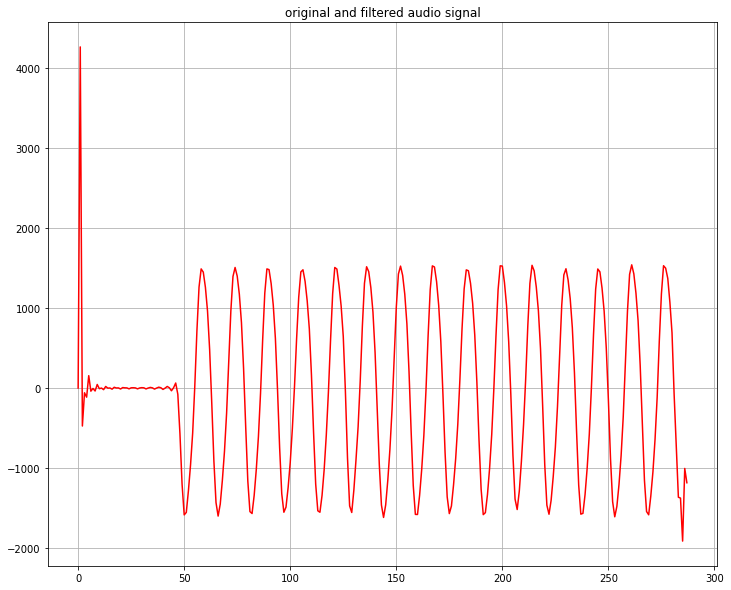

In [10]:
fig = plt.figure(figsize=(12,10))
plt.title("original and filtered audio signal")
#plt.plot(local_test_sig, 'b')
plt.plot(apollo_DF_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()